In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from statistics import median
from scipy.spatial.distance import cdist
import os
import warnings
warnings.filterwarnings('ignore')

duration_data = pd.read_pickle('DataFrames/duration_data_Fermi.dat')
classification = pd.read_csv('DataFrames/classification_Fermi.txt', index_col='GRBname')
group = classification.groupby(classification.type)
fermi_short = group.get_group('S')
fermi_long = group.get_group('L')
fermi_s = [d for d in duration_data.loc[fermi_short.index,'T90']]
fermi_l = [d for d in duration_data.loc[fermi_long.index,'T90']]

path = 'Dropbox/jackson/tsne_maps_fermi/'
counts = {grb:[0,0] for grb in pd.read_pickle('non_fft_dataset_Fermi.dat').index}
miscat = []
files_included = 0
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.Dark2.colors)

for file in os.listdir(path):
#for i in range(100):
    #file = f'embedding_TSNE_Fermi{i}.csv'
    if file == 'embedall.csv':
        continue
    emb = pd.read_csv(path+file,header=None,index_col=0)
    long = int(len(emb.groupby(emb.iloc[:,2]).get_group(1)) > len(emb.groupby(emb.iloc[:,2]).get_group(0)))
    emb.iloc[:,2] = emb.replace({long:1,1-long:0}).iloc[:,2]
    cut = classification.loc[emb.index]
    
    group = emb.groupby(emb.iloc[:,2])
    sample_short = group.get_group(0).iloc[:,:2]
    sample_long = group.get_group(1).iloc[:,:2]
    sample_s = [d for d in duration_data.loc[sample_short.index,'T90']]
    sample_l = [d for d in duration_data.loc[sample_long.index,'T90']]
    
    res_s = st.ks_2samp(fermi_s,sample_s)
    #res_ad_s = st.anderson_ksamp([fermi_s,sample_s])
    res_l = st.ks_2samp(fermi_l,sample_l)
    #res_ad_l = st.anderson_ksamp([fermi_l,sample_l])
    
    min_dist = cdist(sample_short, sample_long).min()
    short_diff = abs(len(classification.loc[emb.index].groupby(classification.loc[emb.index].type).get_group('S')) - len(sample_short))
    
    if min(res_s.pvalue,res_l.pvalue) < 0.2 or min_dist < 0 or short_diff > 10:
        #fig, axs = plt.subplots(1,3,layout='constrained',figsize=[12,4])
        #fig.suptitle(file, size=16)
        #axs[0].scatter(emb[1],emb[2],s=5,c=emb[3].replace({1: 'C4', 0: 'C1'}),alpha=0.5)
        #axs[0].scatter(emb[1],emb[2],s=5,c=classification.replace({'L': 'C4', 'S': 'C1'}).loc[emb.index].type,alpha=0.5)
        #axs[0].set_title(f'min_dist = {np.round(min_dist,2)}, short_diff = {short_diff}')
        #axs[1].hist(np.log10(duration_data.loc[fermi_short.index,'T90']), range = (-3,3), bins = 45, color = 'C1', edgecolor = 'C1', alpha = 0.5)
        #axs[1].hist(np.log10(duration_data.loc[sample_short.index,'T90']), range = (-3,3), bins = 45, color = 'C4', edgecolor = 'C4', alpha = 0.5)
        #axs[1].legend(['Fermi','Sample'])
        #axs[1].text(-3, 40, "p = {:.3}".format(res_s.pvalue), fontsize=12)
        #axs[1].set_title('short')
        #axs[2].hist(np.log10(duration_data.loc[fermi_long.index,'T90']), range = (-1,4), bins = 45, color = 'C1', edgecolor = 'C1', alpha = 0.5)
        #axs[2].hist(np.log10(duration_data.loc[sample_long.index,'T90']), range = (-1,4), bins = 45, color = 'C4', edgecolor = 'C4', alpha = 0.5)
        #axs[2].legend(['Fermi','Sample'])
        #axs[2].text(-1, 150, "p = {:.3}".format(res_l.pvalue), fontsize=12)
        #axs[2].set_title('long')
        #plt.show()
        continue
    
    miscat.append(len(sample_short[~sample_short.index.isin(fermi_short.index)])+len(sample_long[~sample_long.index.isin(fermi_long.index)]))
    
    for i in range(emb.index.size):
        row = emb.iloc[i]
        counts[row.name][int(row[3])] += 1
    files_included += 1

In [2]:
df = pd.DataFrame(counts).T
df[3] = df.max(axis=1)/df.sum(axis=1)
df.columns = ['S', 'L', '%']
print(f'Number of files included: {files_included}')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df)

Number of files included: 570


,S,L,%
GRB080714086,28,198,0.876106
GRB080714425,0,234,1.000000
GRB080714745,0,242,1.000000
GRB080715950,0,251,1.000000
GRB080717543,0,257,1.000000
GRB080719529,0,248,1.000000
GRB080723557,0,248,1.000000
GRB080723913,260,0,1.000000
GRB080723985,0,236,1.000000
GRB080724401,0,250,1.000000


In [3]:
display(df[df.loc[:,'%'] < 1])

,S,L,%
GRB080714086,28,198,0.876106
GRB080806584,17,207,0.924107
GRB080816989,3,240,0.987654
GRB080828189,79,156,0.663830
GRB081006604,230,5,0.978723
...,...,...,...
GRB180418281,205,38,0.843621
GRB180511437,215,15,0.934783
GRB180617872,242,3,0.987755
GRB180618030,80,144,0.642857


(array([   3.,    3.,    5.,    6.,    6.,    3.,   12.,    8.,   15.,
        2233.]),
 array([0.50970874, 0.55873786, 0.60776699, 0.65679612, 0.70582524,
        0.75485437, 0.8038835 , 0.85291262, 0.90194175, 0.95097087,
        1.        ]),
 <BarContainer object of 10 artists>)

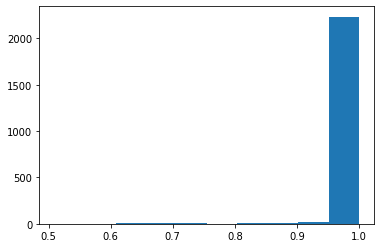

In [4]:
plt.hist(df.loc[:,'%'])

In [5]:
print('proportion of objects below 100% stability: ' + str(round(100*len(df[df.loc[:,'%'] < 1])/len(classification.index), 1)) + '%')
print('proportion of objects below 90% stability: ' + str(round(100*len(df[df.loc[:,'%'] < 0.9])/len(classification.index), 1)) + '%')
print('median percentage of objects that change classification: ' + str(round(100*median(miscat)/1000, 1)) + '%')

proportion of objects below 100% stability: 6.6%
proportion of objects below 90% stability: 2.0%
median percentage of objects that change classification: 0.5%


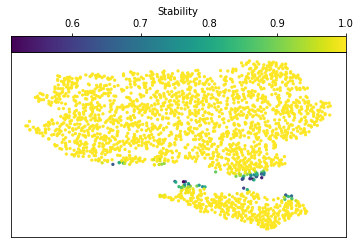

In [6]:
emb_n = pd.read_csv("embedding_TSNE_Fermi_20.csv", header = None, index_col = 0)
emb_plot = plt.scatter(emb_n[1], emb_n[2], s=5, c=df.loc[:,'%'])
plt.xticks([])
plt.yticks([])
cbar = plt.colorbar(emb_plot, label = 'Stability', location = 'top', pad = 0)
#df.to_pickle('DataFrames/stability_Fermi.dat')
#plt.savefig('stability_Fermi.jpg', dpi=300)

In [7]:
df.loc[pd.read_csv('DataFrames/mismatching_classifications.csv').Fermi]

,S,L,%
GRB090531775,242,0,1.000000
GRB090927422,262,0,1.000000
GRB130716442,212,0,1.000000
GRB131004904,184,60,0.754098
GRB140209313,20,227,0.919028
GRB140320092,71,134,0.653659
GRB141205337,237,0,1.000000
GRB150120123,209,34,0.860082
GRB170318644,0,241,1.000000
